In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import seaborn as sns

## "Skewed to the left" aka "negative skew"

In [2]:
deaths = pd.read_csv('np2017_d3.csv') # Deaths by age: https://www.census.gov/data/datasets/2017/demo/popproj/2017-popproj.html

In [3]:
deaths = deaths.loc[(deaths['RACE_HIS'] == 0) & 
                    (deaths['SEX'] == 0) & (deaths['YEAR'] == 2017)] # all races & sexes, year 2017

In [4]:
deaths = pd.wide_to_long(deaths, ['DTH'], i = 'YEAR', 
                         j = 'age', sep = '_').reset_index()[['YEAR', 'age', 'DTH']] # wide to long format

In [5]:
deaths['number'] = deaths['DTH']/1000 # convert number of deaths to thousands

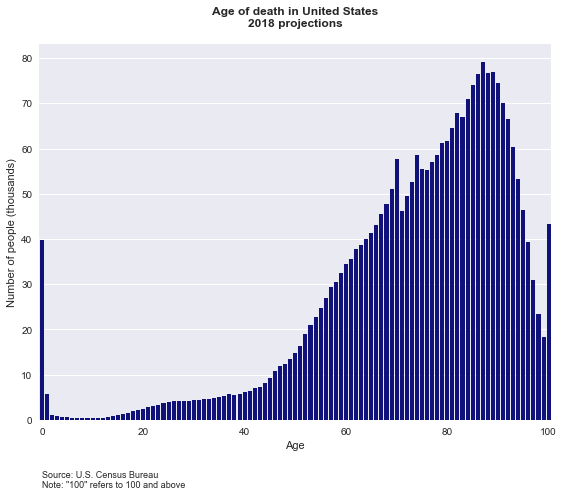

In [14]:
sns.set()
plt.figure(figsize=(8,6))
ax = sns.barplot(x="age", y="number", color="darkblue", data=deaths)
ax.xaxis.set_major_locator(ticker.MultipleLocator(20)) # https://stackoverflow.com/questions/43639096/setting-the-interval-of-x-axis-for-seaborn-plot
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set(xlabel='Age', ylabel='Number of people (thousands)')
ax.text(0, -15,'Source: U.S. Census Bureau\nNote: "100" refers to 100 and above', fontsize=9)
plt.tight_layout()
plt.title('Age of death in United States\n2018 projections\n', weight='bold')
plt.savefig('left.png', dpi = 400, bbox_inches="tight")
plt.show()

## "Skewed to the right" aka "positive skew"

In [7]:
incomes = pd.read_csv('hinc06_allraces.csv') # "all races" columns of hhinc06.xls, via https://www.census.gov/data/tables/time-series/demo/income-poverty/cps-hinc/hinc-06.html

In [8]:
incomes = incomes.loc[incomes['Income of Household'] != '....Total'].reset_index(drop = True)

In [9]:
incomes['Number'] = incomes['Number'].str.replace(',', '')
incomes['Number'] = incomes['Number'].astype(int)

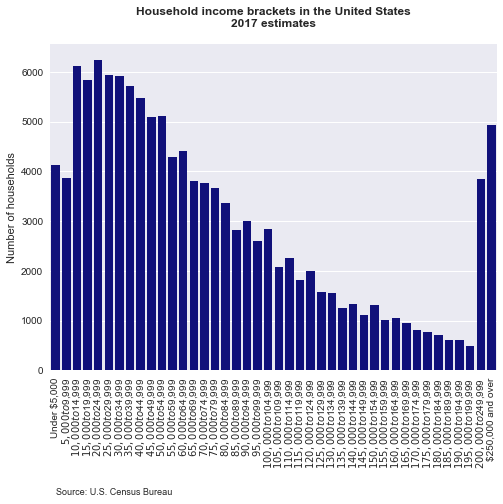

In [13]:
sns.set()
plt.figure(figsize=(8,6))
ax = sns.barplot(x="Income of Household", y="Number", color="darkblue", data=incomes)
ax.set(xlabel='', ylabel='Number of households')
ax.text(0, -2500,'Source: U.S. Census Bureau', fontsize=9)
plt.title('Household income brackets in the United States\n2017 estimates\n', weight='bold')
plt.xticks(rotation=90)
plt.savefig('right.png', dpi = 400, bbox_inches="tight")
plt.show()